In [1]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import json

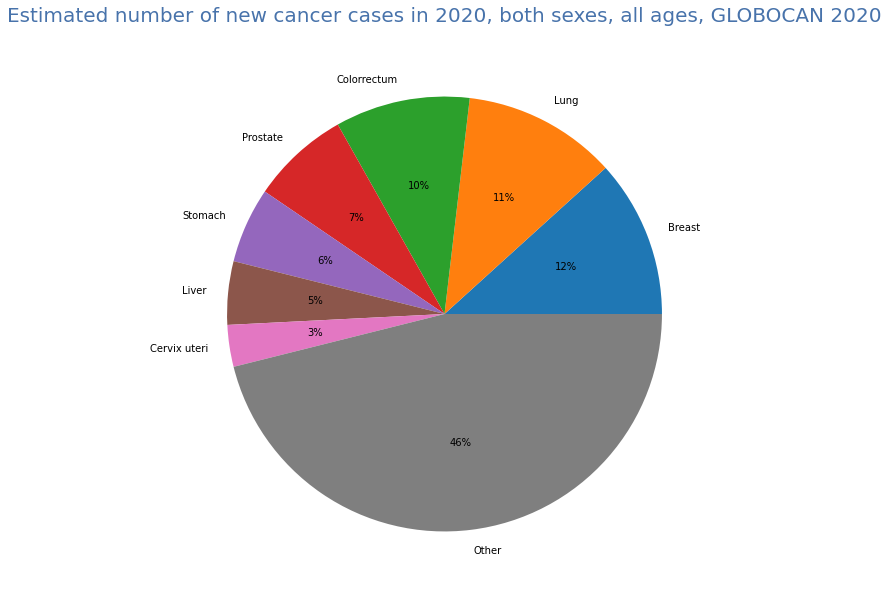

In [2]:
# Piechart (basic)
fig, ax = plt.subplots(figsize=(10, 10))
cancer_type = ['Breast', 'Lung', 'Colorrectum', 'Prostate', 'Stomach', 'Liver', 'Cervix uteri', 'Other']
new_cases = [11.7, 11.4, 10.0, 7.3, 5.6, 4.7, 3.1, 46.0]
ax.pie(new_cases, labels=cancer_type, radius=1, autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.1)
ax.set_title('Estimated number of new cancer cases in 2020, both sexes, all ages, GLOBOCAN 2020',
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
plt.show()


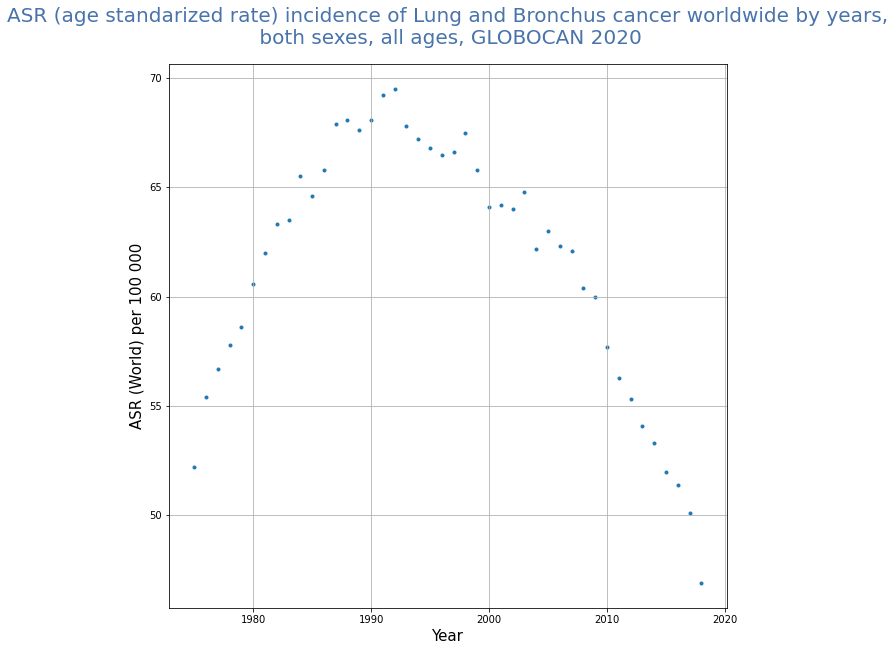

In [3]:
# Scatterplot (basic)
fig, ax = plt.subplots(figsize=(10, 10))
years = range(1975, 2019)
incidence = [52.2, 55.4, 56.7, 57.8, 58.6, 60.6, 62.0, 63.3, 63.5, 65.5, 64.6, 65.8, 67.9, 68.1, 67.6, 68.1, 69.2, 69.5, 67.8, 67.2, 66.8, 66.5, 66.6, 67.5, 65.8, 64.1, 64.2, 64.0, 64.8, 62.2, 63.0, 62.3, 62.1, 60.4, 60.0, 57.7, 56.3, 55.3, 54.1, 53.3, 52.0, 51.4, 50.1, 46.9]
ax.scatter(years, incidence, marker='.')

ax.set_title('ASR (age standarized rate) incidence of Lung and Bronchus cancer worldwide by years,\n both sexes, all ages, GLOBOCAN 2020',
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_ylabel('ASR (World) per 100 000', fontsize = 15)
ax.set_xlabel("Year", fontsize = 15)
ax.grid()
plt.show()

/home/milax/Documents/MIV/data-visualization/mypython/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


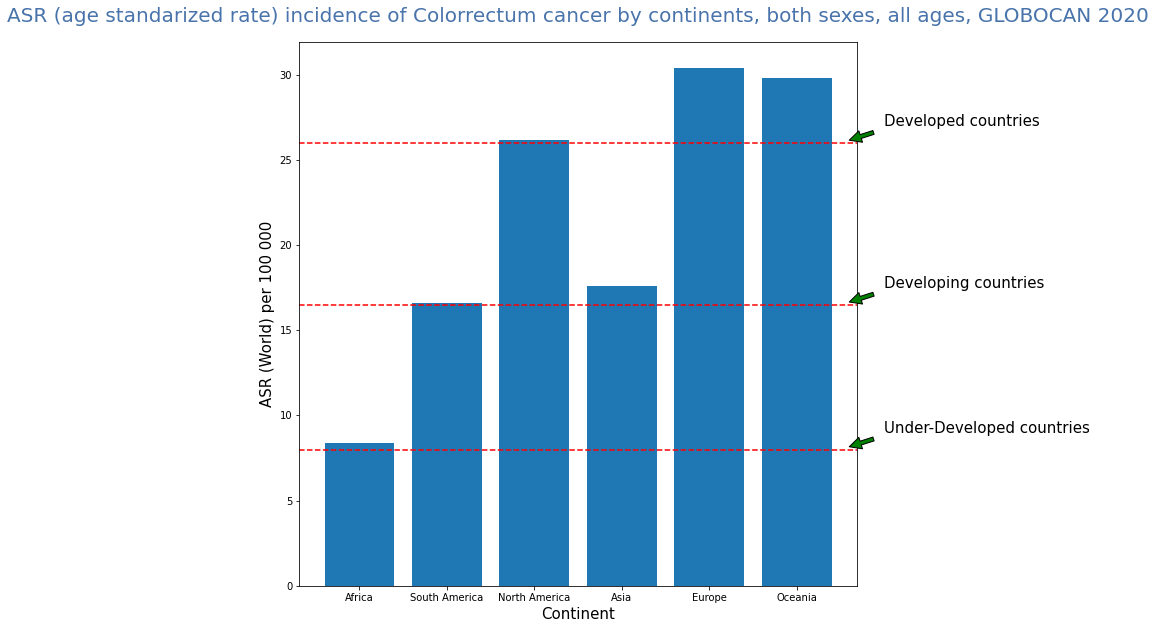

In [4]:
# Bar chart (basic, adding the message i want to give: relation with country development)

fig, ax = plt.subplots(figsize=(10, 10))
continents = ['Africa', 'South America', 'North America', 'Asia', 'Europe', 'Oceania']
incidence = [8.4, 16.6, 26.2, 17.6, 30.4, 29.8]

x = np.arange(len(continents))
ax.bar(x, incidence)

ax.set_title('ASR (age standarized rate) incidence of Colorrectum cancer by continents, both sexes, all ages, GLOBOCAN 2020',
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_ylabel('ASR (World) per 100 000', fontsize = 15)
ax.set_xlabel("Continent", fontsize = 15)
ax.set_xticks(x, continents, fontsize = 10) #numbres to labels


# Adding annotation on the plot.

ax.annotate('Developed countries', xy=(5.5, 26), xytext=(6, 27), fontsize=15,
            arrowprops=dict(facecolor='green', shrink=0.2))
plt.axhline(y=26, color='red', linestyle='--')

ax.annotate('Developing countries', xy=(5.5, 16.5), xytext=(6, 17.5), fontsize=15,
            arrowprops=dict(facecolor='green', shrink=0.2))
plt.axhline(y=16.5, color='red', linestyle='--')

ax.annotate('Under-Developed countries', xy=(5.5, 8), xytext=(6, 9), fontsize=15,
            arrowprops=dict(facecolor='green', shrink=0.2))
plt.axhline(y=8, color='red', linestyle='--')
            


fig.show()


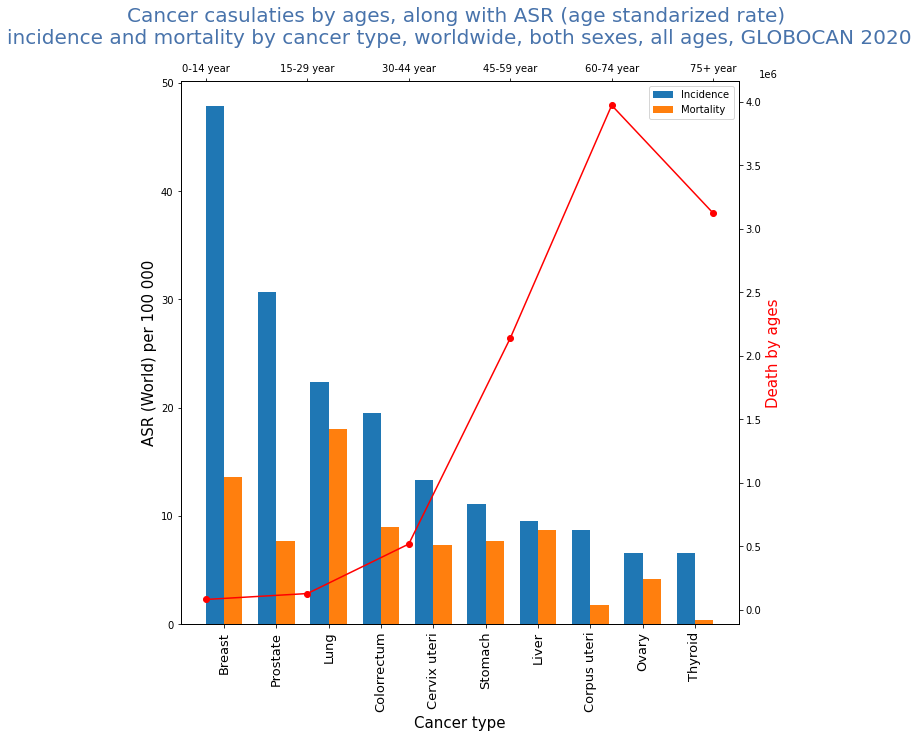

In [5]:
# Multiple bar and line plot (2 data type)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Cancer casulaties by ages, along with ASR (age standarized rate) \nincidence and mortality by cancer type, worldwide, both sexes, all ages, GLOBOCAN 2020',
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})

ax2 = ax.twiny().twinx() # generate secondary x and y axes

#data
cancer_type = ['Breast', 'Prostate', 'Lung', 'Colorrectum', 'Cervix uteri', 'Stomach', 'Liver', 'Corpus uteri', 'Ovary', 'Thyroid']
incidence = [47.8, 30.7, 22.4, 19.5, 13.3, 11.1, 9.5, 8.7, 6.6, 6.6]
mortality = [13.6, 7.7, 18.0, 9.0, 7.3, 7.7, 8.7, 1.8, 4.2, 0.43]

ages = ['0-14 year', '15-29 year', '30-44 year', '45-59 year', '60-74 year', '75+ year']
ages_mortality = [80104, 126689, 516909, 2138051, 3972982, 3123398]

# bar charts
x = np.arange(len(cancer_type))  # labels to numbers
width = 0.35  # the width of the bars
ax.bar(x - width/2, incidence, width, label='Incidence')
ax.bar(x + width/2, mortality, width, label='Mortality')

ax.set_ylabel('ASR (World) per 100 000', fontsize = 15)
ax.set_xlabel("Cancer type", fontsize = 15)
ax.set_xticks(x, cancer_type, rotation='vertical', fontsize = 13) #numbres to labels
ax.legend()


ax2.plot(ages, ages_mortality, label = 'Death by ages', marker = 'o', color = 'red');
ax2.set_ylabel('Death by ages', color='red', fontsize = 15)

t = ax2.yaxis.get_offset_text() # move scientific notation to right
t.set_x(1.07)



plt.show()

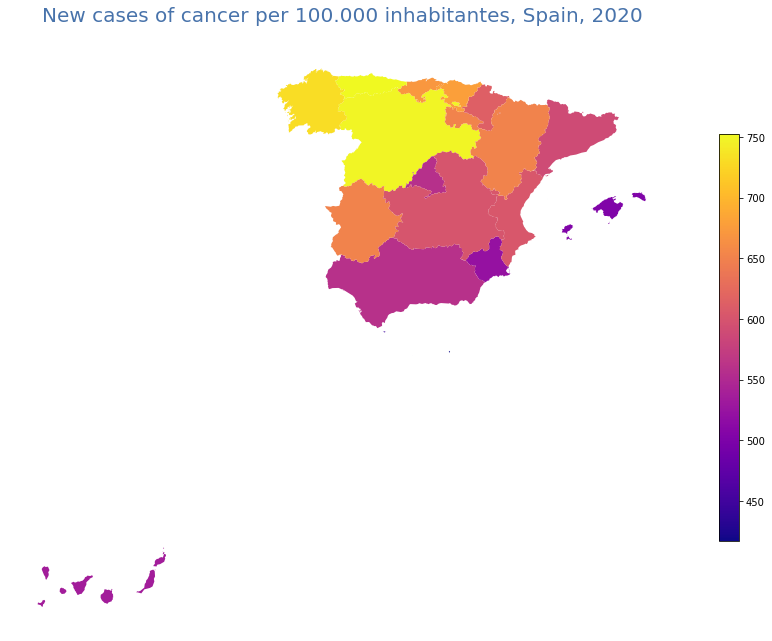

In [6]:
# Map plot (complex)

map_data = gpd.read_file('./casosEspaña.geojson')

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('New cases of cancer per 100.000 inhabitantes, Spain, 2020', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})

 
# Mostrar el mapa finalizado
map_data.plot(column='Valor', cmap='plasma', ax=ax,legend=True, legend_kwds={'shrink': 0.5})


ax.set_axis_off()
plt.show()